# Climate Change in Round Rock, Texas 
#### Matthew Woodland

## Introduction
Areas across the globe are facing the dangers of a changing climate (CITATION). From heightened extremes (CITATION), to worsened natural disasters (CITATION), climate change is exposing the vulnerability of communities everywhere. 

In this short exercise, I will explore the changing climate in my hometown, Round Rock, Texas. I will investigate changes in preciptation and temperature patterns from September 2000 to September 2025. 


## Climate History of Round Rock, TX
Round Rock is a medium-sized suburban development just north of Austin, Texas. It is named after a literal rock that is round...ish. *INSERT PICTURE HERE* 

Given its location in central Texas, summers are hot (often exceeding 100°F), humid, and usually dry. Droughts and heatwaves are common during this time. 

## Downloading Data
Data used for this project will be from the Global Historical Climatology Network–Daily (GHCN-Daily) dataset, curated by the National Centers for Environmental Information (NCEI). The NCEI’s GHCN-Daily dataset compiles daily climate observations from land-based stations worldwide, including airports, weather stations, and other observer-run sites. These stations measure variables such as temperature (standardized in degrees Fahrenheit; although it can be changed based on user preference), precipitation, snowfall, and snow depth. Data are updated frequently from ~30 different sources and then integrated and quality-checked by NCEI to ensure accuracy and consistency.

I am using a station in Georgetown, TX, another suburb just about 10 miles from Round Rock. The station measured at 8am everyday and only has 4% missingness. All observations for 1981 and 2025 were removed, however, due to the incompleteness of the year.


### Reference
Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ. Retrieved September 29, 2025. 

In [1]:
# Loading in Packages
import pandas as pd
import earthpy as ep

c:\Users\matth\miniconda3\envs\earth-analytics-python\Lib\site-packages\earthpy\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [16]:
# Accessing Data from NCEI
RR_url = ('https://www.ncei.noaa.gov/access/services/data'
'/v1?dataset=daily-summaries&dataTypes=TOBS,PRCP' #Temperature (TOBS) in Fahrenheit & Precipitation (PRCP) in inches
'&stations=USC00413507' #Georgetown, TX station ID (USC00413507) b/c it's near RR (~10mi) & has supposedly 96% coverage from 1981-07-01 to 2025-09-26
'&startDate=1981-07-01&endDate=2025-09-26&units=standard') #Beginning of monitor deployment to present
RR_url

# Download the climate data
climate_RR_raw_df = pd.read_csv(
    RR_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Confirm download worked
climate_RR_raw_df.head()


,STATION,PRCP,TOBS
DATE,,,
1981-07-01,USC00413507,0.00,76.0
1981-07-02,USC00413507,0.00,77.0
1981-07-03,USC00413507,0.00,75.0
1981-07-04,USC00413507,0.01,75.0
1981-07-05,USC00413507,0.14,72.0


In [31]:
# Cleaning up dataframe
#Renaming & Selecting Columns
climate_RR_df = climate_RR_raw_df[['TOBS', 'PRCP']].rename( # keeping only temperature & precipitaion columns
    columns={'TOBS': 'temp_F', # renaming temperature column
             'PRCP': 'precip_in'} # renaming precipitation column
             )
climate_RR_df

#Removing incomplete years (1981 & 2025)
climate_RR_df = climate_RR_df[
    (climate_RR_df.index < "2025-01-01") #Keep everything before 2025
    & (climate_RR_df.index > "1981-12-31") #Keep everything 1982 and beyond
    ]
climate_RR_df


,temp_F,precip_in
DATE,,
1982-01-01,34.0,0.00
1982-01-02,55.0,0.01
1982-01-03,60.0,0.01
1982-01-04,38.0,0.00
1982-01-05,42.0,0.00
...,...,...
2024-12-27,58.0,0.04
2024-12-28,65.0,0.01
2024-12-29,57.0,0.00


In [32]:
#change to Celsius? We'll keep it in Fahrenheit for now

# Convert precipitation from inches to milimeters
def convert_in_to_mm(precip_in):
    """Convert inches temperature to milimeters"""
    precip_mm = precip_in * 25.4
    return precip_mm # Put your equation in here

climate_RR_df['precip_mm'] = (
    climate_RR_df['precip_in'].apply(convert_in_to_mm))

climate_RR_df

,temp_F,precip_in,precip_mm
DATE,,,
1982-01-01,34.0,0.00,0.000
1982-01-02,55.0,0.01,0.254
1982-01-03,60.0,0.01,0.254
1982-01-04,38.0,0.00,0.000
1982-01-05,42.0,0.00,0.000
...,...,...,...
2024-12-27,58.0,0.04,1.016
2024-12-28,65.0,0.01,0.254
2024-12-29,57.0,0.00,0.000


In [34]:
# Resampling to annual mean for each variable
annual_climate_RR_df = (
    climate_RR_df
    .resample('YS') #YS = YearStart (Jan 01)
    .mean() #compute average within the year
)
annual_climate_RR_df.head()

,temp_F,precip_in,precip_mm
DATE,,,
1982-01-01,58.449036,0.093874,2.384390
1983-01-01,56.960674,0.090219,2.291567
1984-01-01,59.834254,0.089399,2.270732
1985-01-01,59.680441,0.121260,3.080011
1986-01-01,60.549451,0.109452,2.780082


<Axes: title={'center': 'Average Annual Temperature in Round Rock, TX (2001-2025)'}, xlabel='Year', ylabel='Temperature (F)'>

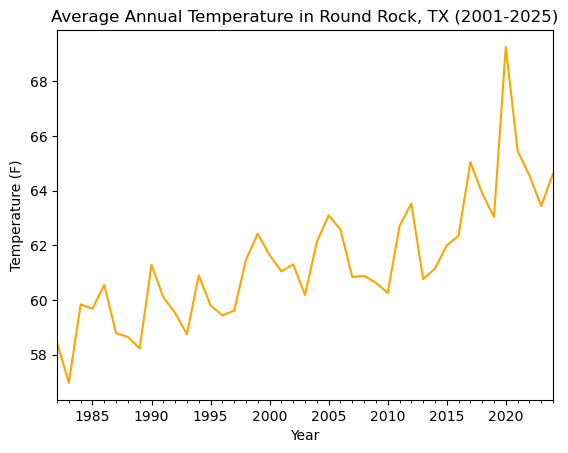

In [ ]:
# Plotting the Results
# ADD DESCRIPTIVE TITLE INTERPRETING THE PLOT
annual_climate_RR_df.plot(
    y='temp_F', #temp data to display
    title='Average Annual Temperature in Round Rock, TX (2001-2025)',
    xlabel='Year',
    ylabel='Temperature (F)',
    legend=False,
    color='orange', #color of data 
    xlim=('1982', '2024') #manually setting x limits (better formats the plot)
)



In [7]:
# loading a few more packages
import holoviews as hv #for saving the plot later
import hvplot.pandas #for loading the interactive plot

In [36]:
# Plot the annual data interactively
RR_annual_temp_interactive = annual_climate_RR_df.hvplot(
    y='temp_F',
    title='The Steady Increase of Annual Average Temperature in Round Rock, TX (1981-2025)',
    xlabel='Year',
    ylabel='Temperature (F)',
    legend=False,
    color='orange'
    )
RR_annual_temp_interactive

:Curve   [DATE]   (temp_F)

In [ ]:
# Saving Plot -- COMMENTED OUT SO YOU DON'T HAVE TO DOWNLOAD ON YOUR OWN PC
# hv.save(RR_annual_temp_interactive, 'RR_annual_temp_interactive.html') 

In [38]:
# Importing Packages for Ordinary Least Squares

# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression
# makes it easier to work with large amounts of numbers
import numpy as np

In [ ]:
# Fit an OLS Linear Regression to the data

# Filter to just temperature & drop NANs
annual_RR_climate_df_clean = annual_climate_RR_df[['temp_F']].dropna(
    subset=["temp_F"]
    )


#Getting the data in the correct format for scikit-learn
X = (
annual_RR_climate_df_clean
# Extract year from date
.index.year
#Values as array
.values
# Reshape 'Year' column to be a 2D array for scikit-learn
.reshape(-1, 1))

y = annual_RR_climate_df_clean['temp_F'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.14730105015166953
Intercept: -233.62958061452758
